# Supervised Learning, TACC Machine Learning Institute 2021

Author: Weijia Xu

Modified by: Kelly Pierce

## AM Session

### Install any packages you need in your environment

In [1]:
!pip3 install --user seaborn
!pip3 install --user scikit-learn 

     |████████████████████████████████| 286kB 7.3MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 22.3MB 8.7MB/s eta 0:00:01�███████████▋               | 11.5MB 8.7MB/s eta 0:00:02:00:01�██████████████ | 21.6MB 8.7MB/s eta 0:00:01
     |████████████████████████████████| 307kB 71.3MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from sklearn import neighbors
import matplotlib.patches as mpatches

Define helper functions for plotting.

In [2]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#fee5d9', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#a50f15', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

def plot_two_class_knn(X, y, n_neighbors, weights, X_test, y_test):
    X_mat = X
    y_mat = y

    # Create color maps
    cmap_light = ListedColormap(['#fee5d9', '#AAFFAA', '#AAAAFF','#EFEFEF'])
    cmap_bold  = ListedColormap(['#a50f15', '#00FF00', '#0000FF','#000000'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    title = "Neighbors = {}".format(n_neighbors)
    if (X_test is not None):
        train_score = clf.score(X_mat, y_mat)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    patch0 = mpatches.Patch(color='#a50f15', label='class 0')
    patch1 = mpatches.Patch(color='#000000', label='class 1')
    plt.legend(handles=[patch0, patch1])

    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title(title)

    plt.show()

### K-NN Decision boundaries with synthetic data sets

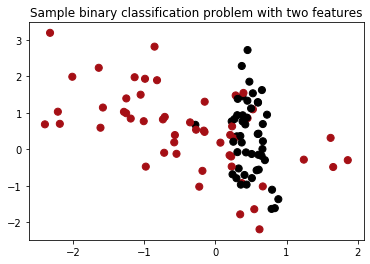

In [3]:
# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

cmap_bold = ListedColormap(['#a50f15', '#00FF00', '#fb6a4a','#000000'])
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


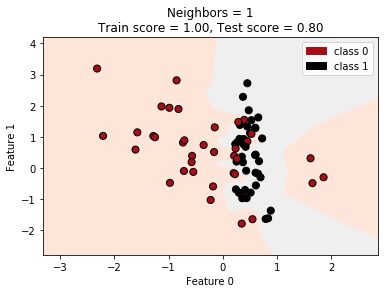

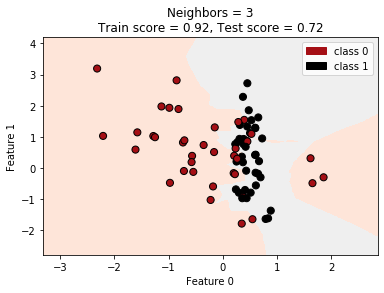

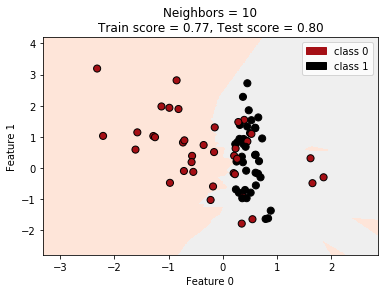

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state=0)
plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 10, 'uniform', X_test, y_test)

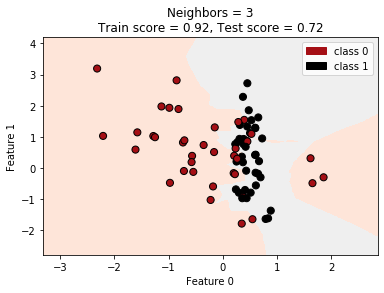

In [5]:
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)

## K-Nearest Neighobur classification 

For this example, we use iris data set. https://archive.ics.uci.edu/ml/datasets/iris

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

The data set consists of 150 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

The iris.data has 150 samples each of which has 4 features. e.g. first two data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]
The iris.target has lables (one of ['setosa' 'versicolor' 'virginica']) for 150 samples. e.g. first two labels [0 0]


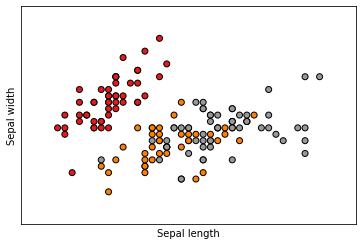

In [18]:
#about iris dataset
from sklearn import datasets
iris = datasets.load_iris()

print('The iris.data has {} samples each of which has {} features. e.g. first two data: {}'
      .format(iris.data.shape[0], iris.data.shape[1], iris.data[:2]))
print('The iris.target has lables (one of {}) for {} samples. e.g. first two labels {}'
      .format(iris.target_names, iris.target.shape[0], iris.target[:2]))

#print(iris.DESCR)

X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure()
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [19]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Hands-on exercise

Run the following three code blocks to (1) run the KNN classifier on the iris dataset, (2) generate a confusion matrix, and (3) generate a ROC curve for your model.

Inspect your results, and then repeat the process with the following modifications:

- Change the training size in your `test_train_split`. The provided value is 0.6, meaning 60% of your data will be used to train and 40% of your data will be used to test. What happens to your model performance if you train with more data? What happens if you train with less data?
- Change the `n_neighbors` used in your `KNeighborsClassifier`. What happens to your model performance if you use more neighbors to inform classification? What happens if you use fewer neighbors?

In [20]:
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state = 0)

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


examples = [[5.9,  3.,   5.1,  1.8], [4.4, 1.9, 1.4, 0.2]]
predictions= knn.predict(examples)

print('Predicted iris type for ', examples, ' is ', 
          [iris.target_names[x] for x in predictions ] )

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.97
Predicted iris type for  [[5.9, 3.0, 5.1, 1.8], [4.4, 1.9, 1.4, 0.2]]  is  ['virginica', 'setosa']


In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.96      0.96      0.96        23
   virginica       0.95      0.95      0.95        21

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

[[16  0  0]
 [ 0 22  1]
 [ 0  1 20]]


1.0
0.9888366627497063
0.9884004884004884


<Figure size 432x288 with 0 Axes>

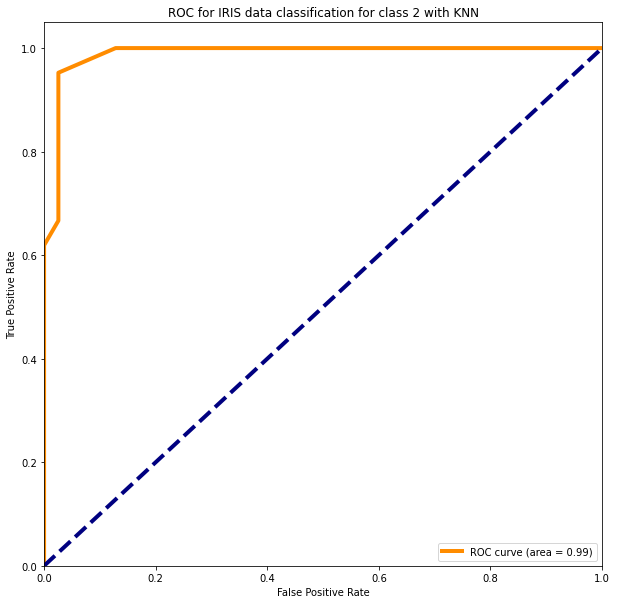

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y = label_binarize(y_test, classes=[0, 1, 2])
y_score=knn.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(roc_auc[i])

plt.figure()
plt.figure(figsize=(10,10))
lw = 4
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for IRIS data classification for class 2 with KNN')
plt.legend(loc="lower right")
plt.show()

## Support Vector Machine 

In [23]:
# Support vector machine
# Linear Support Vector Machine
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.90
Accuracy of Linear SVC classifier on test set: 0.90


/Users/kpierce/ML_2021/mli-venv/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = LinearSVC().fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('Polynomial-kernel (degree=3) SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Polynomial-kernel (degree=3) SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))


Breast cancer dataset (normalized with MinMax scaling)
Polynomial-kernel (degree=3) SVC (with MinMax scaling) training set accuracy: 0.98
Polynomial-kernel (degree=3) SVC (with MinMax scaling) test set accuracy: 0.97


[[49  4]
 [ 1 89]]


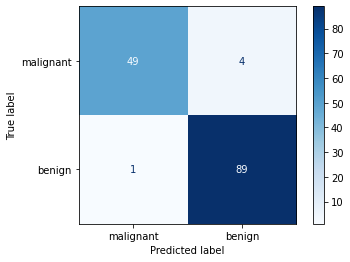

In [25]:
from sklearn.metrics import plot_confusion_matrix
cancer=load_breast_cancer()
disp = plot_confusion_matrix(clf, X_test_scaled, y_test,
                                 display_labels=cancer.target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
print(disp.confusion_matrix)
plt.show()

In [26]:
# Multi-class classification with linear models
# LinearSVC with M classes generates M one vs rest classifiers.
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LinearSVC(C=5, random_state = 67).fit(X_train_scaled, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Coefficients:
 [[-0.64222849  1.39836013 -2.24842395 -2.02760334]
 [-0.19627313 -2.25948035  1.99199278 -1.80429646]
 [-0.85022646 -1.40063347  4.21927455  4.11948534]]
Intercepts:
 [ 0.74078086  0.57847221 -4.40623807]
Accuracy of Linear SVC classifier on training set: 0.95
Accuracy of Linear SVC classifier on test set: 0.95


[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]


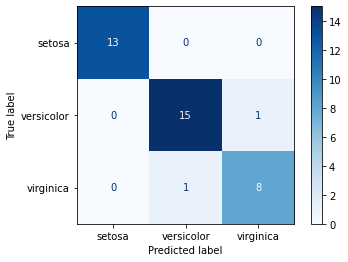

In [27]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, X_test_scaled, y_test,
                                 display_labels=iris.target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
print(disp.confusion_matrix)
plt.show()

In [28]:
#RBF Kernel unnormalized data
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 0.92
Accuracy of RBF-kernel SVC on test set: 0.94


In [29]:
#RBF Kernel normlized 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.99
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.97


In [30]:
#Polynomial Kernel normlized 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(kernel='poly', degree =5).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('Polynomial-kernel (degree=3) SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Polynomial-kernel (degree=3) SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (normalized with MinMax scaling)
Polynomial-kernel (degree=3) SVC (with MinMax scaling) training set accuracy: 0.99
Polynomial-kernel (degree=3) SVC (with MinMax scaling) test set accuracy: 0.96


## Naive Bayes Classification 

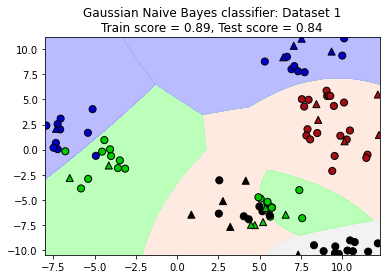

In [31]:
# Naive Bayes classifiers
from sklearn.naive_bayes import GaussianNB

X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state = 0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 1')


In [32]:
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X_cancer[:, 0:10] , y_cancer, random_state = 0)
nbclf = GaussianNB().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.92
Accuracy of GaussianNB classifier on test set: 0.90


## Decision tree

In [33]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


In [34]:
# setting maximum depth

clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


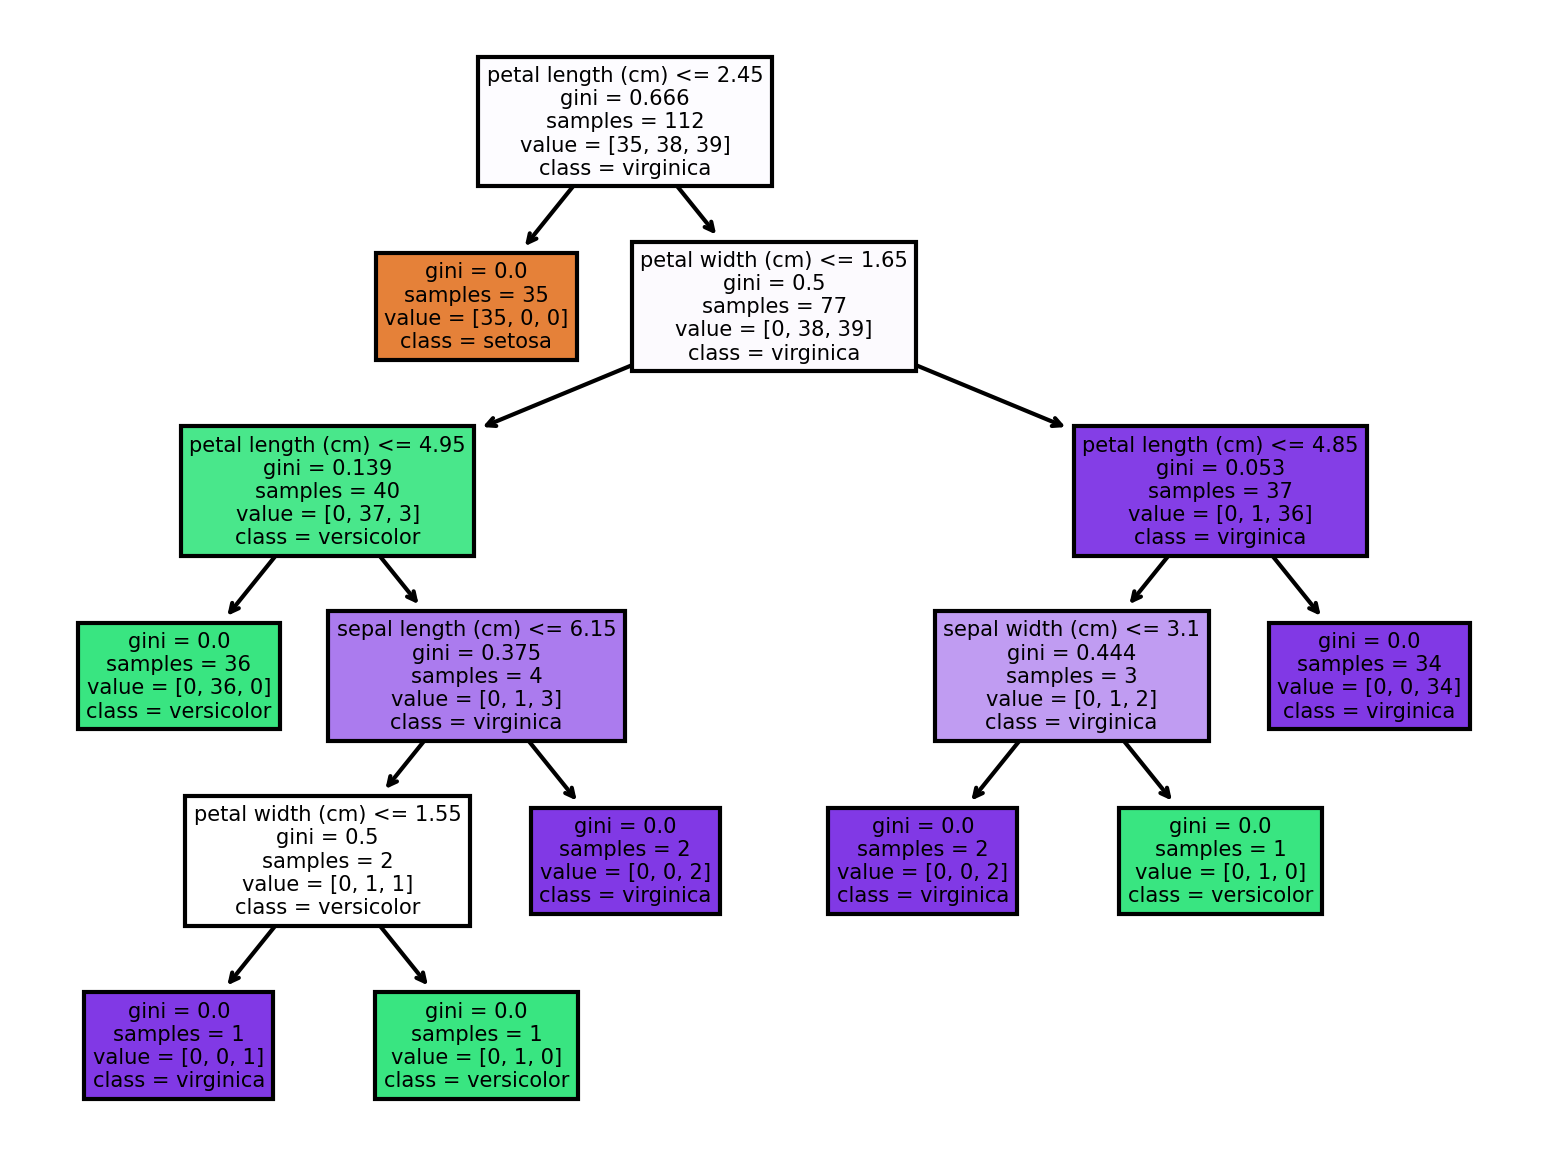

In [35]:
from sklearn.tree import plot_tree
import importlib
import matplotlib as mpl
importlib.reload(mpl); importlib.reload(plt); importlib.reload(sn)
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
plt.figure(dpi=300)
plot_tree(clf, feature_names = fn, class_names=cn,filled = True);
plt.show()

## Random Forest

In [36]:
# Random forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state = 0)

clf = RandomForestClassifier().fit(X_train, y_train)
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


Accuracy of GaussianNB classifier on training set: 1.00
Accuracy of GaussianNB classifier on test set: 0.84


In [37]:
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)


clf = RandomForestClassifier().fit(X_train, y_train)
print('Accuracy of RandomForest classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


Accuracy of RandomForest classifier on training set: 1.00
Accuracy of RandomForest classifier on test set: 0.97


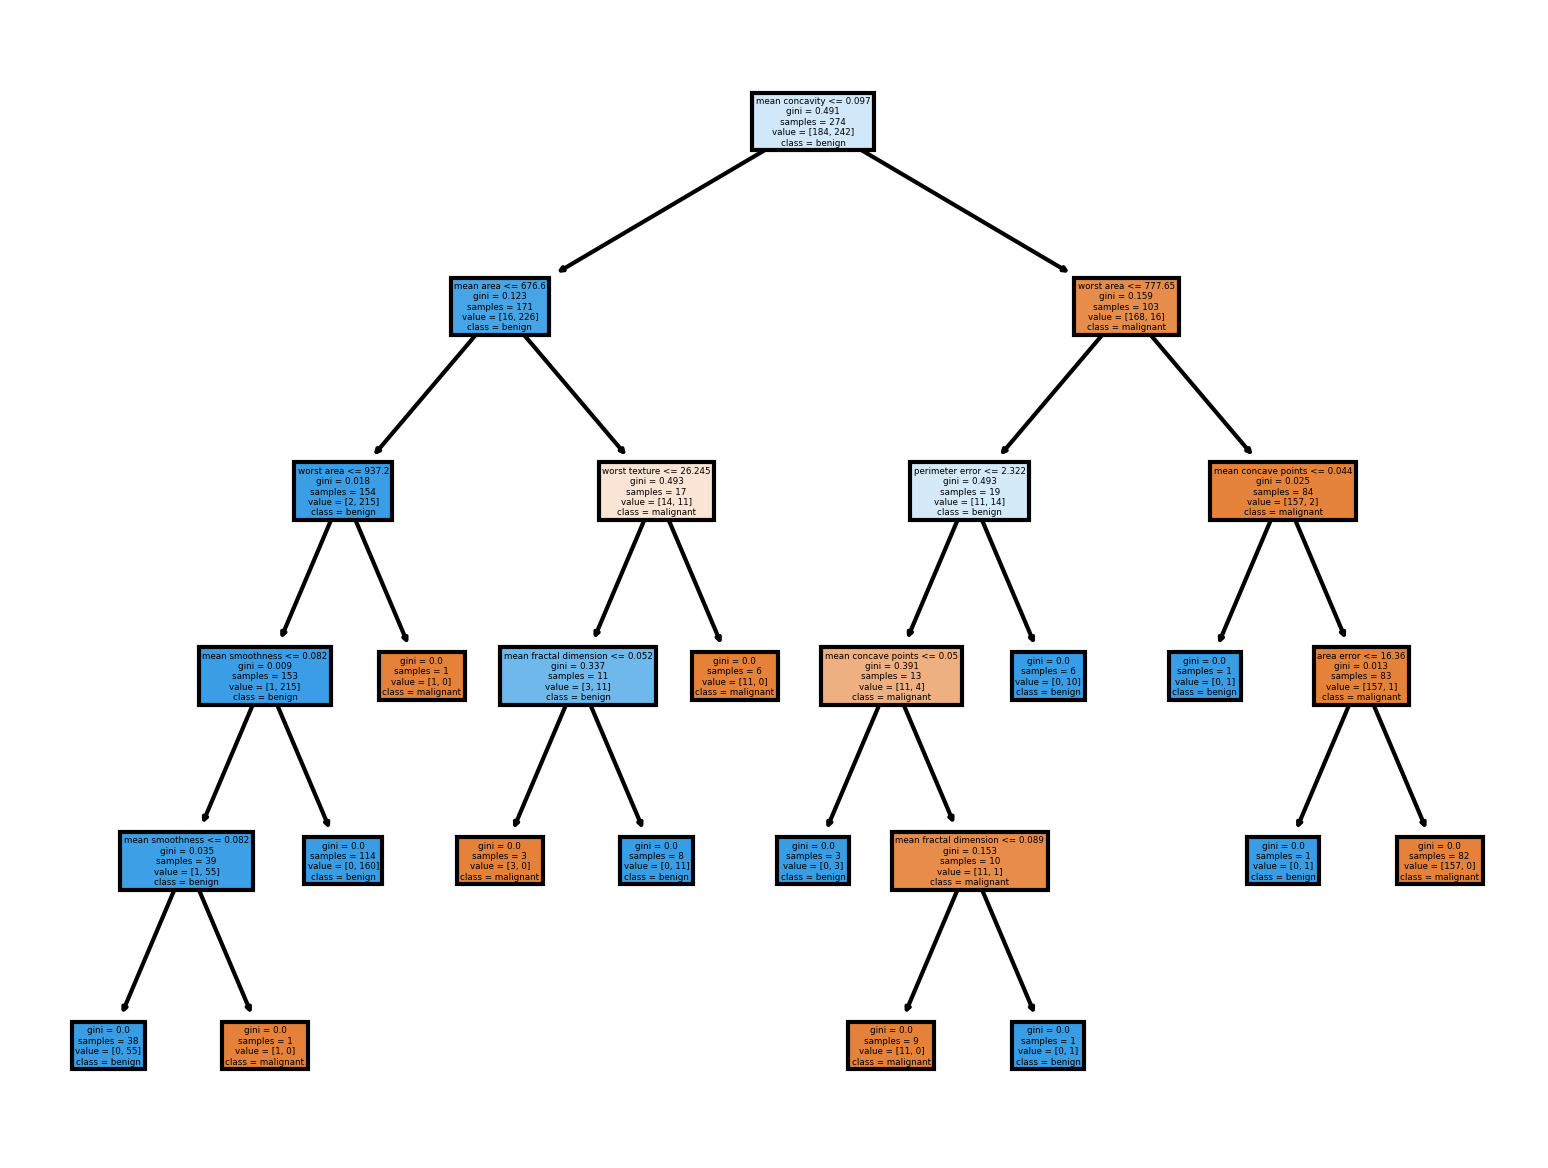

In [38]:
cancer= load_breast_cancer()
plt.figure( dpi=300)
plot_tree(clf.estimators_[2], feature_names = cancer.feature_names, 
          class_names = cancer.target_names, filled = True);
plt.show()

## PM Session

### Linear Regression 

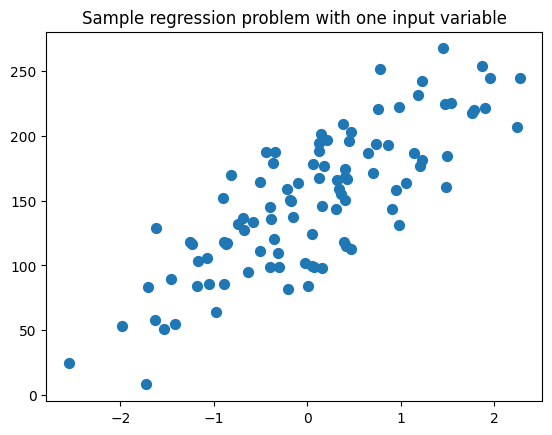

linear model coeff (w): [45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


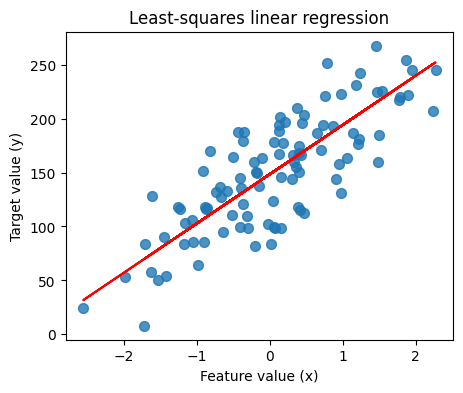

In [39]:
# linear regression with synthetic binary data
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [40]:
# Regression with Boston Housing dataset
from sklearn.datasets import load_boston
house = load_boston()
print('The house.data has {} samples each of which has {} features. e.g. first two data: {}'
      .format(house.data.shape[0], house.data.shape[1], house.data[:2]))
print('The house.target has values for {} samples. e.g. first two labels {}'
      .format(house.target.shape[0], house.target[:5]))

The house.data has 506 samples each of which has 13 features. e.g. first two data: [[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]]
The house.target has values for 506 samples. e.g. first two labels [24.  21.6 34.7 33.4 36.2]


In [41]:
print(house.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

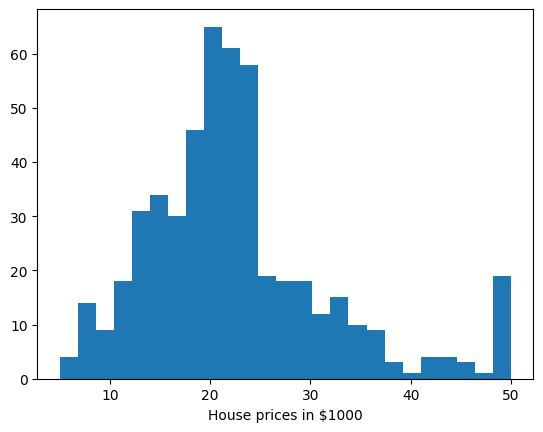

In [42]:
#sn.set(rc={'figure.figsize':(5,5)})
plt.figure()
plt.hist(house.target, bins=25)
plt.xlabel("House prices in $1000")
plt.show()

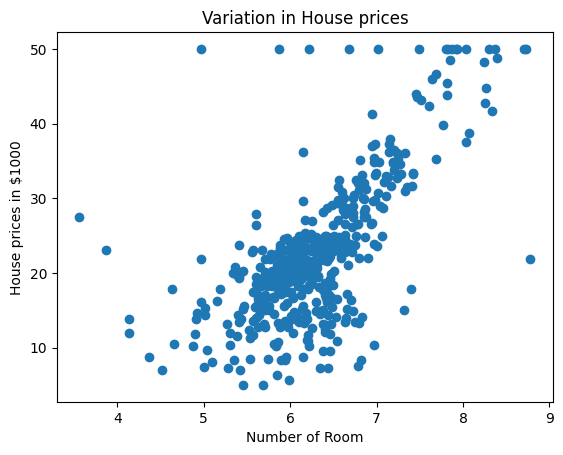

In [43]:
plt.figure()
plt.scatter(house.data[:, 5:6] , house.target, marker='o')
plt.title("Variation in House prices")
plt.xlabel("Number of Room")
plt.ylabel("House prices in $1000")
plt.show()

In [59]:
house = load_boston()
X_train, X_test, y_train, y_test = train_test_split(house.data, house.target, test_size=0.2,
                                                   random_state = 33)
linreg = LinearRegression().fit(X_train, y_train)

print('Boston House dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Boston House dataset
linear model intercept: 33.046064463200715
linear model coeff:
[-1.11307273e-01  5.00960846e-02  2.95392471e-02  3.00839630e+00
 -1.53479542e+01  4.04002314e+00 -1.43524468e-03 -1.54300055e+00
  3.23076531e-01 -1.35366479e-02 -8.38134260e-01  8.73220222e-03
 -5.83597765e-01]
R-squared score (training): 0.746
R-squared score (test): 0.692


Check the model performance by inspecting residual error from the test data. Residuals should be normally distributed with a mean near zero.

In [62]:
import seaborn as sns
x_predict = LinearRegression().fit(X_train, y_train).predict(X_test)
residuals = x_predict - y_test

/Users/kpierce/ML_2021/mli-venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

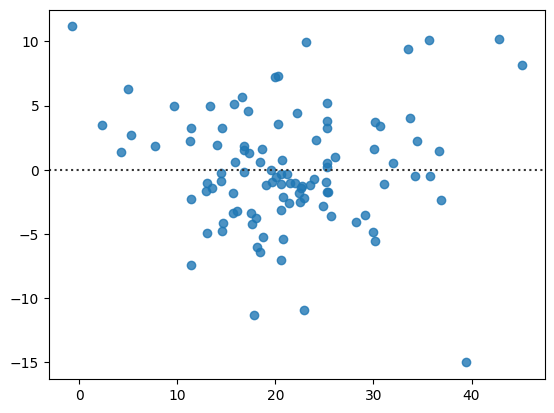

In [61]:
sns.residplot(x_predict, y_test)

(array([ 1.,  3., 11., 20., 32., 23.,  9.,  2.,  0.,  1.]),
 array([-14.59627202, -11.38535153,  -8.17443104,  -4.96351055,
         -1.75259006,   1.45833043,   4.66925092,   7.88017141,
         11.0910919 ,  14.30201239,  17.51293288]),
 <BarContainer object of 10 artists>)

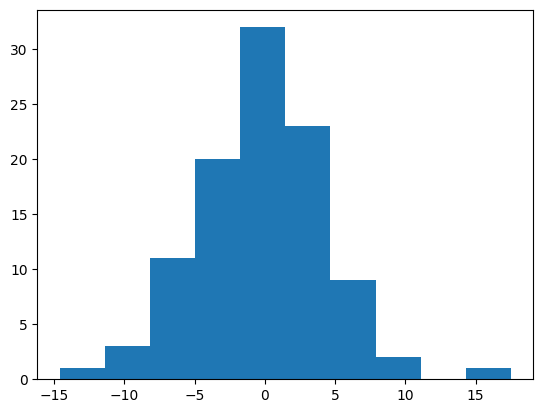

In [63]:
plt.hist(residuals)

### Linear vs logistic regression for classification

The code blocks below use the breast cancer dataset (benign and malignant classifications). The first approach uses linear regression to fit the classifications, while the second approach uses logistic regression. Which performs better?

In [45]:
# Regression with breast cancer dataset
cancer = load_breast_cancer()
print('The cancer.data has {} samples each of which has {} features. e.g. first two data: {}'
      .format(cancer.data.shape[0], cancer.data.shape[1], cancer.data[:2]))
print('The cancer.target has lables (one of {}) for {} samples. e.g. first two labels {}'
      .format(cancer.target_names, cancer.target.shape[0], cancer.target[:2]))

The cancer.data has 569 samples each of which has 30 features. e.g. first two data: [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]]
The cancer.target has lables (one of ['malignant' 'benign']) for 569 samples. e.g. first two labels [0 0]


In [46]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [47]:
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 33)
linreg = LinearRegression().fit(X_train, y_train)

print('Breast cancer dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Breast cancer dataset
linear model intercept: 2.7908980515041115
linear model coeff:
[ 2.68590609e-01  4.18326809e-03 -1.68604795e-02 -9.48960904e-04
 -6.04639295e-01  3.26943895e+00 -1.76601663e+00 -3.74970478e-01
 -1.21467914e+00  5.33311165e+00 -1.92281496e-01  1.69533519e-02
  5.69114663e-02 -9.68714683e-04 -1.88036531e+01 -1.79353493e+00
  2.98115773e+00 -6.83497847e+00 -6.60383968e+00  9.40117491e+00
 -2.60104813e-01 -1.22345044e-02 -2.17334253e-04  1.42546936e-03
 -3.44025523e-01  8.70286919e-02 -8.62913124e-02 -1.36653294e+00
  2.90509822e-01 -5.47705082e+00]
R-squared score (training): 0.777
R-squared score (test): 0.736


In [48]:
# Logistic regression
# Logistic regression for binary classification )
from sklearn.linear_model import LogisticRegression

(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer[:, 20:30], y_cancer,
                                                   random_state = 0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(C=100).fit(X_train_scaled, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))



Accuracy of Logistic regression classifier on training set: 0.98
Accuracy of Logistic regression classifier on test set: 0.99


In [49]:
# Ridge regression
from sklearn.linear_model import Ridge
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 33)
linridge = Ridge(alpha=5.0).fit(X_train, y_train)

print('Breast cancer dataset')
print('linear model intercept: {}'
     .format(linridge.intercept_))
print('linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Breast cancer dataset
linear model intercept: 2.480993436415546
linear model coeff:
[ 0.19703773  0.00559621 -0.00687236 -0.00101718 -0.0457217  -0.04833332
 -0.10178118 -0.07303373 -0.07009841 -0.00928787 -0.08422306 -0.01708418
  0.0131691  -0.00048117 -0.01293358 -0.00272521  0.01323953 -0.01024966
 -0.0220751  -0.00102882 -0.25463133 -0.01280632  0.00081385  0.00133612
 -0.09116337 -0.13478247 -0.2051189  -0.13787801 -0.15641293 -0.03098376]
R-squared score (training): 0.735
R-squared score (test): 0.715
Number of non-zero features: 30


In [50]:
# Ridge classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = RidgeClassifier(alpha=20.0).fit(X_train_scaled, y_train)

print('Breast cancer dataset')
print('linear model intercept: {}'
     .format(linridge.intercept_))
print('linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Breast cancer dataset
linear model intercept: [1.81505752]
linear model coeff:
[[-0.31906247 -0.28167597 -0.31246215 -0.22844776 -0.14790379 -0.15013893
  -0.23791063 -0.382122   -0.14959553  0.13758251 -0.15438857 -0.00529125
  -0.11072699 -0.06453069  0.05693419  0.09519612  0.06208952 -0.05036667
  -0.00278652  0.09537742 -0.40252131 -0.33066352 -0.3672447  -0.24751261
  -0.27257539 -0.22816516 -0.27549601 -0.55525171 -0.26282441 -0.10806388]]
R-squared score (training): 0.941
R-squared score (test): 0.951
Number of non-zero features: 30


In [51]:
# Ridge regression with regularization parameter: alpha
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 8, r-squared training: 0.78, r-squared test: 0.73

Alpha = 1.00
num abs(coeff) > 1.0: 0, r-squared training: 0.75, r-squared test: 0.73

Alpha = 10.00
num abs(coeff) > 1.0: 0, r-squared training: 0.72, r-squared test: 0.71

Alpha = 20.00
num abs(coeff) > 1.0: 0, r-squared training: 0.70, r-squared test: 0.70

Alpha = 50.00
num abs(coeff) > 1.0: 0, r-squared training: 0.65, r-squared test: 0.65

Alpha = 100.00
num abs(coeff) > 1.0: 0, r-squared training: 0.57, r-squared test: 0.58

Alpha = 1000.00
num abs(coeff) > 1.0: 0, r-squared training: 0.16, r-squared test: 0.16



In [52]:
# Logistic regression regularization: C parameter
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for this_C in [0.1, 1, 100]:
    clf = LogisticRegression(C=this_C).fit(X_train_scaled, y_train)
    print('Accuracy of Logistic regression classifier with C value: {} on training set: {:.2f}'
     .format(this_C, clf.score(X_train_scaled,  y_train)))
    print('Accuracy of Logistic regression classifier with C value: {} on test set: {:.2f}'
     .format(this_C, clf.score(X_test_scaled, y_test)))

Accuracy of Logistic regression classifier with C value: 0.1 on training set: 0.93
Accuracy of Logistic regression classifier with C value: 0.1 on test set: 0.95
Accuracy of Logistic regression classifier with C value: 1 on training set: 0.97
Accuracy of Logistic regression classifier with C value: 1 on test set: 0.96
Accuracy of Logistic regression classifier with C value: 100 on training set: 0.99
Accuracy of Logistic regression classifier with C value: 100 on test set: 0.96
